In [1]:
#LEVEL3

In [2]:
#Task1 

In [3]:
#Productive Modeling 

In [6]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as pt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data = pd.get_dummies(data, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [14]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = data[features]
y = data[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.rand(100)
}
df = pd.DataFrame(data)

# Define X and y
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train and evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Print results
        print(f"Model: {model_name}")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("---------------------------")
    except Exception as e:
        print(f"Error occurred with model {model_name}: {e}")


Model: Linear Regression
Mean Squared Error: 0.13253269020000852
R-squared: -0.1372247476864925
---------------------------
Model: Decision Tree
Mean Squared Error: 0.22608561773851638
R-squared: -0.9399754068239128
---------------------------
Model: Random Forest
Mean Squared Error: 0.13429658670792272
R-squared: -0.15236023432100199
---------------------------


In [17]:
#Task 2

In [18]:
#Relationship between the type of Cuisine and the restaurant's rating 

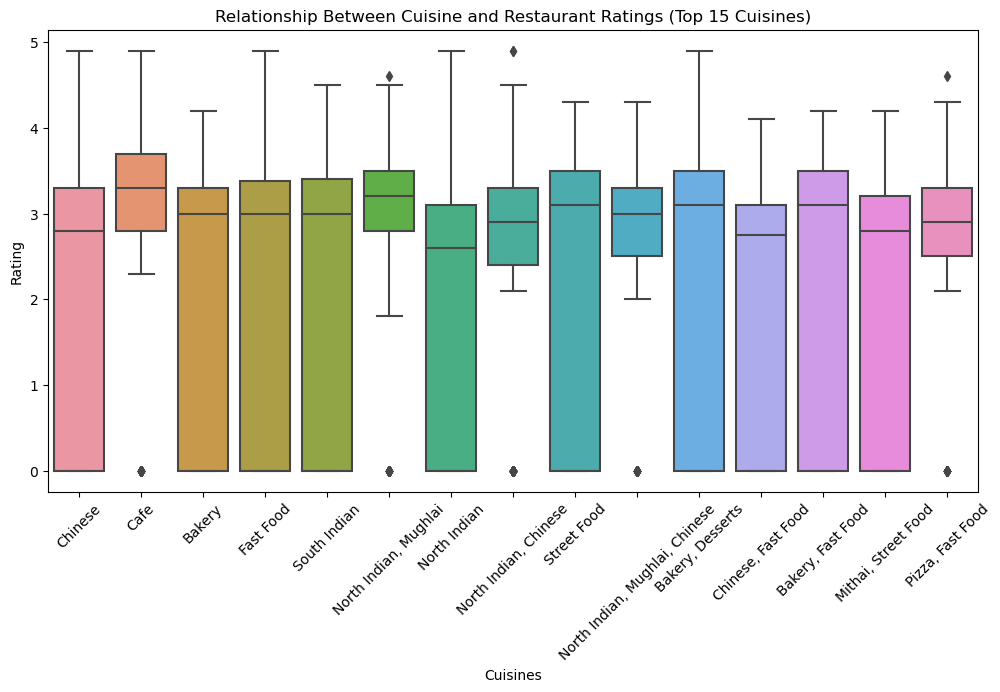

In [26]:
from matplotlib import pyplot as plt 
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")
top_n = 15

# Get the top N cuisines
top_cuisines = data['Cuisines'].value_counts().nlargest(top_n).index
data_filtered = data[data['Cuisines'].isin(top_cuisines)]
plt.figure(figsize= (12,6))
sns.boxplot(data = data_filtered,x='Cuisines',y='Aggregate rating')
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



In [27]:
#Most popular Cuisisnes By Number of Votes 

In [28]:
top_cuisines = data.groupby('Cuisines')['Votes'].sum().nlargest(10)
print("Top cuisines by number of votes")
print(top_cuisines)

Top cuisines by number of votes
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [29]:
#Cuisines with higher Ratings 

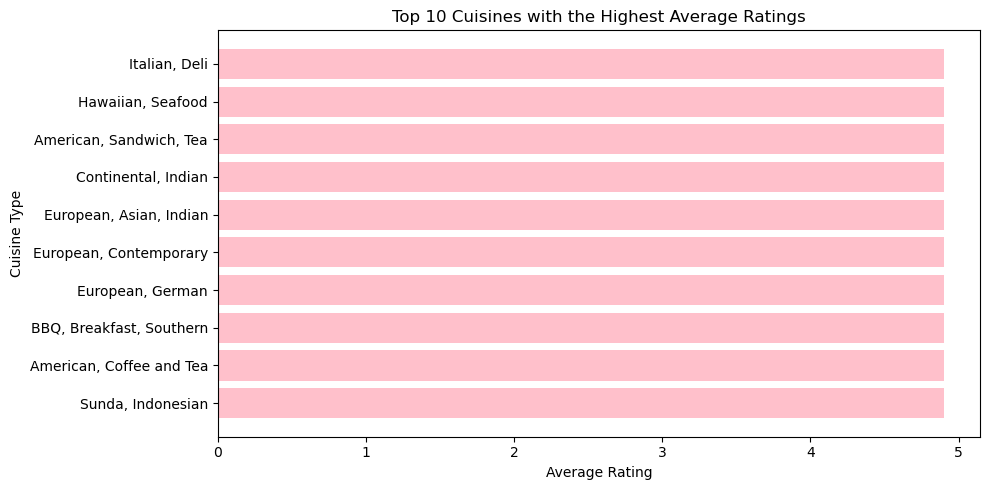

In [32]:
from matplotlib import pyplot as plt 
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")
cuisine_ratings =data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating',ascending=False)
plt.figure(figsize=(10,5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='pink')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()
plt.show()

In [33]:
#DATA Visualisation

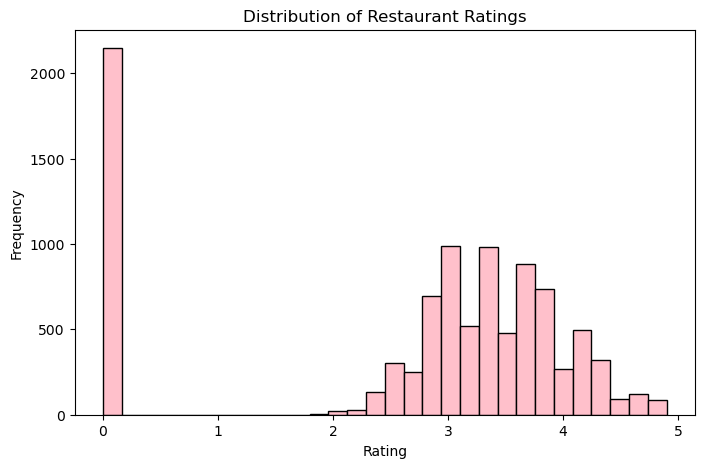

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(data['Aggregate rating'], bins=30, color='pink', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

In [36]:
#Distriution of ratings using a barplot 

   Aggregate rating Rating Category
0               4.8             4-5
1               4.5             4-5
2               4.4             4-5
3               4.9             4-5
4               4.8             4-5
Rating counts by category:
Rating Category
0-1    2148
1-2       3
2-3    1430
3-4    4590
4-5    1380
Name: count, dtype: int64


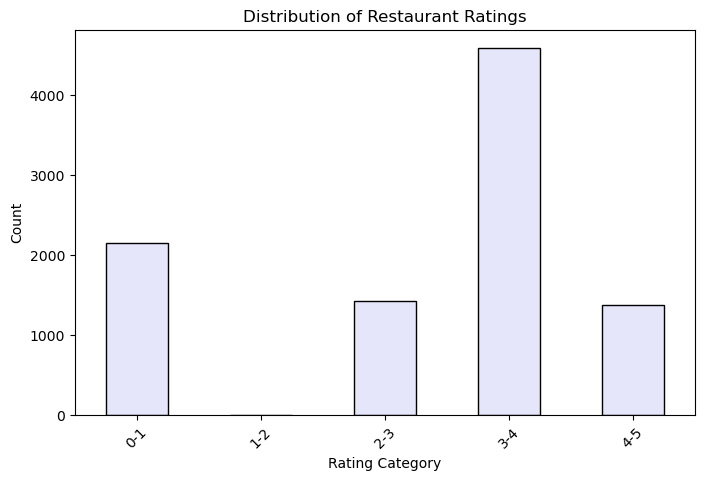

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")
df = pd.DataFrame(data)

# Debug: Check if 'Aggregate rating' column exists
if 'Aggregate rating' not in df.columns:
    raise ValueError("Column 'Aggregate rating' not found in DataFrame")

# Debug: Check for null values in 'Aggregate rating' column
if df['Aggregate rating'].isnull().any():
    raise ValueError("Null values found in 'Aggregate rating' column")

# Define bins and labels
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, right=False, include_lowest=True)
print(df[['Aggregate rating', 'Rating Category']].head())
rating_counts = df['Rating Category'].value_counts().sort_index()
print("Rating counts by category:")
print(rating_counts)
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='lavender', edgecolor='black')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.xticks(rotation=45)
plt.show()


In [42]:
#comparing average ratings for different cuisines 

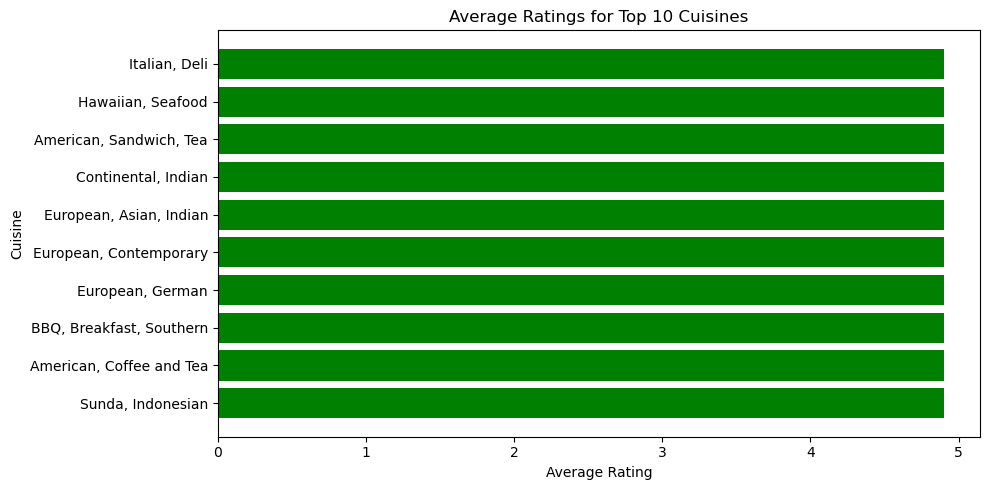

In [45]:
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='green')

# Add labels and title
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

In [46]:
#comparing average ratings for different cities  

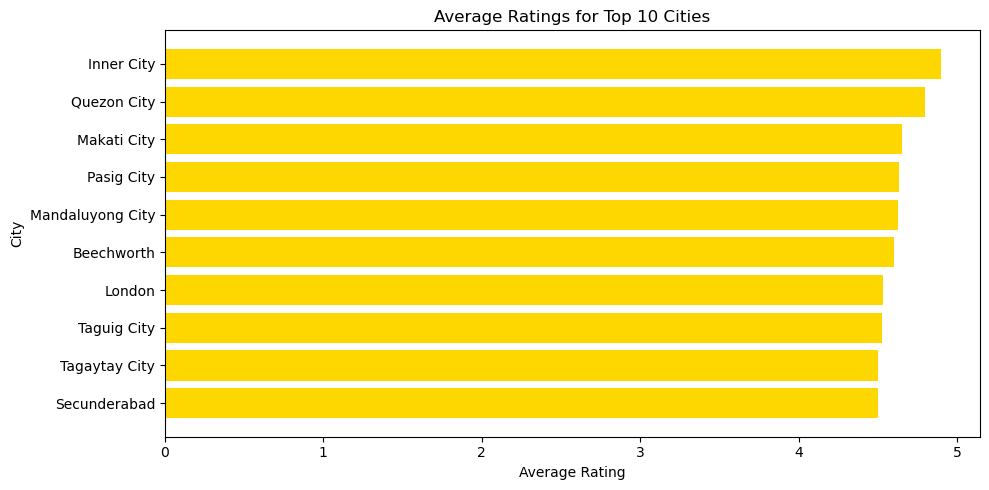

In [47]:
city_ratings = data.groupby('City')['Aggregate rating'].mean().reset_index()
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='gold')
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [48]:
#Relationship between various features and the target variable 

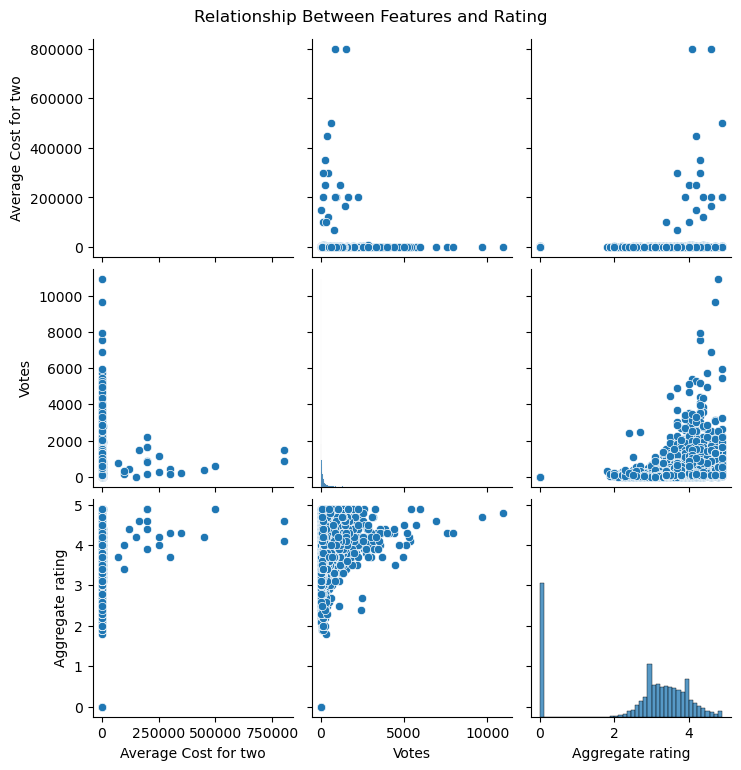

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration purposes (replace this with your actual data)
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")
df = pd.DataFrame(data)

# Debug: Check if the specified columns exist
required_columns = ['Average Cost for two', 'Votes', 'Aggregate rating']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame")

# Debug: Check for null values in the specified columns
if df[required_columns].isnull().any().any():
    raise ValueError("Null values found in one or more of the specified columns")

# Create a pairplot
sns.pairplot(data=df, vars=required_columns)

# Add a title
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Show the plot
plt.show()
